# Homework 2

### Imports:

In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.svm import SVC
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in data

In [2]:
training = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

### Splitting data

In [3]:
X_train = training.drop(training.columns[3], axis=1)
y_train = training['0.000000']
X_test = test.drop(test.columns[3], axis=1)
y_test = test['1.000000']

### Grayscale representation of data

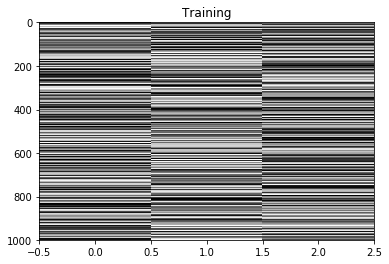

In [4]:
plt.imshow(X_train, aspect = 'auto', cmap='gray')
plt.title('Training') 

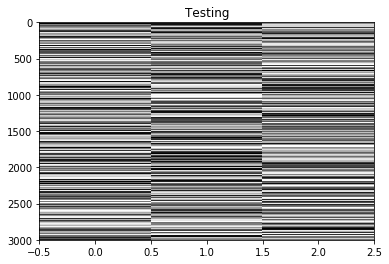

In [5]:
plt.imshow(X_test, aspect = 'auto', cmap='gray')
plt.title('Testing') 

# SVM Modeling

### Creating models with different C and degree

In [6]:
models = []
C = [0.0001, 0.001, 0.01, 0.1, 1]
d = [1, 2, 3, 5]
kernel = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
for k in d:
    for i in C:
        models.append(SVC(C = i, degree = k, kernel = 'poly'))

### Training models and recording scores

In [7]:
training_scores = []
test_scores = []
for model in models:
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

### Training Error Grid

In [8]:
pd.DataFrame(data = np.array([training_scores[0:5],
                              training_scores[5:10], 
                              training_scores[10:15],
                              training_scores[15:20]]), 
                              columns = ["0.0001", "0.001", "0.01", "0.1", "1"])

,0.0001,0.001,0.01,0.1,1
0,0.910911,0.910911,0.911912,0.961962,0.965966
1,0.910911,0.910911,0.910911,0.910911,0.910911
2,0.948949,0.978979,0.981982,0.981982,0.982983
3,0.981982,0.984985,0.982983,0.983984,0.983984


### Validation Error Grid

In [9]:
pd.DataFrame(data = np.array([test_scores[0:5],
                              test_scores[5:10], 
                              test_scores[10:15],
                              test_scores[15:20]]), 
                              columns = ["0.0001", "0.001", "0.01", "0.1", "1"])

,0.0001,0.001,0.01,0.1,1
0,0.558520,0.628209,0.812271,0.779260,0.768590
1,0.558520,0.558520,0.558520,0.558520,0.558520
2,0.875959,0.921641,0.939313,0.943648,0.942648
3,0.902301,0.899967,0.896632,0.898966,0.899967


### On what basis would you decide that a hyperparameter setting is optimal? 

In comparing the training scores, a hyperparameter of 1 is optimal, but when comparing the test scores 0.1 is best. The testing hyperparameter is the most optimal because with that hyperparameter, we get a lower training score, which helps against overfitting, and a higher testing score, the result we want in the end. Interestingly, with suboptimal degree values, different hyperparameters are better, but when looking at the absolute best hyperparameter and degree options, a hyperparameter of 0.1 is optimal.

### Which setting of (C, d) gave the optimal results?

The optimal (C, d) is (0.1 ,3). With these parameters, the validation score is ~94%. Compared to the default parameters, the only difference is that C is 0.1 instead of 1. With different degrees, there are different optimal hyperparameters, but with different hyperparameters, a degree of 3 is optimal except with hyperparameter of 0.0001, which results in a score that is still lower than with the other parameters of 0.1. 

### You’ll notice that between C and d, one factor mattered far more than the other. What can you conclude about the structure of the datasets and how they were generated?

Between C and d, the degree caused the biggest delta in scores. Since the degree sets the highest power of the polynomial function used to model the data, and we know degree 3 modeled the data best, the dataset must be in a cubic function shape. The dataset must have been generated based off a cubic function, with slight variation, since the model did not have a 100% score. 

### With as much granularity as possible, which hyperparameter settings are underfitting and which are overfitting? What allows you to make this claim?

The hyperparameter of 1 is overfitting, because highest scores on the training data with degree less than 5, ~98.4%, while having lower score than other hyperparameters in the validation set.
The hyperparameter of 0.0001 is underfitting because it has the lowest training and validation scores, ~91% and ~56% respectively, again for degree less than 5.

This further demonstrates the effectiveness of hyperparameter 0.1 and degree 3. With these values, it strikes a good balance between overfitting and underfitting. The score is high for training, but has the highest validation score of ~94.4%.

# K Fold Cross Validation

### Creating models with various gamma

In [10]:
models = []
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for g in gamma:
    models.append(SVC(kernel = 'rbf', gamma = g))

### Training models and recording scores

In [11]:
training_scores = []
test_scores = []
for model in models:
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

### Plot of error with increasing gamma values on training

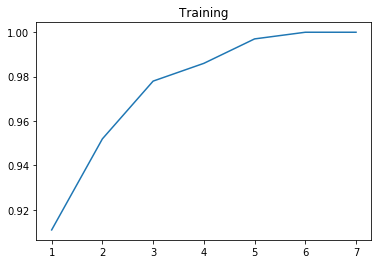

In [12]:
plt.plot([1,2,3,4,5,6,7],training_scores)
plt.title('Training') 

### Plot of error with increasing gamma values on validation

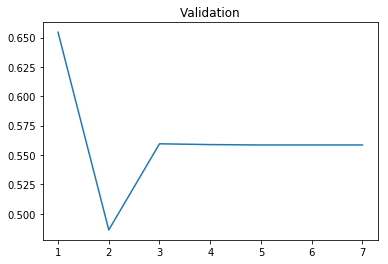

In [13]:
plt.plot([1,2,3,4,5,6,7],test_scores)
plt.title('Validation') 